### windows
##### pip install xgboost 安装
##### pip --ungrade xgboost 更新

### mac
##### brew install gcc@7
##### pip3 install xgboost

##### 提升集成算法重要参数：n_estimators
##### 集成算法通过在数据集上构建多个弱评估器，汇总所有评估器的建模结果，以获取比单个模型更好的回归或分类表现



In [11]:
import xgboost as xgb #使用独有的数据读取类型
# 读取数据：xgb.DMatrix()
# 设置参数：param={}
# 训练模型：bst=xgb.train(param)
# 预测结果：bst.predict()

# 分类树：投票法
# 回归树：均值法
# 叶子权重：所有在这个叶子节点上的样本在这一棵树上的回归取值
# 在提升算法中，求解步骤是层层递进的

from xgboost import XGBRegressor as XGBR
# 随机森林
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import LinearRegression as LinearR
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split as TTS,KFold,cross_val_score as CVS
from sklearn.metrics import mean_squared_error as MSE

# 数据处理与可视化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 性能指标
from time import time
import datetime


# 加载数据集
data=load_boston()
x,y=data.data,data.target
x.shape

# 划分训练集和测试集
x_train,x_test,y_train,y_test=TTS(x,y,test_size=0.3,random_state=1)
# 数据预处理（在划分数据集之后对训练集进行预处理）
# 使用处理拟合后的对象对测试集进行处理


# 使用原生xgb
reg=XGBR(n_estimators=100).fit(x_train,y_train)
reg.score(x_test,y_test) #返回r方

0.8933774609770851

In [10]:
MSE(y_test,reg.predict(x_test))

9.772434127636975

In [13]:
reg.feature_importances_ #查看特征贡献分数（树模型）

array([0.01329388, 0.00148624, 0.00699809, 0.00678644, 0.03720598,
       0.20090286, 0.02319714, 0.07751334, 0.01365997, 0.02116102,
       0.05274786, 0.01391206, 0.5311351 ], dtype=float32)

In [28]:
# 利用交叉验证对比三种模型结果
cvs_score=[]
reg=XGBR(n_estimators=100
         #,silent=False #打印相关信息
        ) #xgboot
rfr=RFR(n_estimators=100) #RFR
lr=LinearR()

names=["xgboost","rfr","linearR"]
model=[reg,rfr,lr]
for i in range(len(model)):
    begin=time()
    cvs=CVS(model[i],x_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()
    cvs_score.append(cvs)
    print("name %s: neg_mean_squared_score:%.4f"%(names[i],cvs))
    print("time cost :",datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))


    
# 有验证集的模型在测试集训练好的时候才是泛化能力好的模型

name xgboost: neg_mean_squared_score:-12.8447
time cost : 00:00:314603
name rfr: neg_mean_squared_score:-11.8517
time cost : 00:00:703662
name linearR: neg_mean_squared_score:-26.0107
time cost : 00:00:005010


In [23]:
# 查看模型评估指标
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

### 使用交叉验证观察xgboost在该数据集上的表现

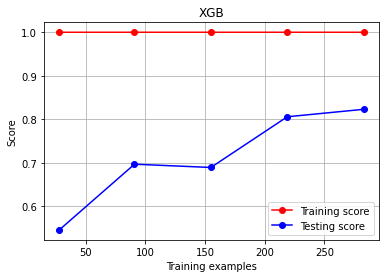

过拟合，可以降低训练得分或者提升测试得分


In [37]:
from sklearn.model_selection import learning_curve 
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(estimator,title,x,y
                        ,cv=None
                        ,ax=None
                        ,ylim=None
                        ,n_jobs=None
                       ):
    
    train_sizes,train_scores,test_scores=learning_curve(estimator,x,y
                                                        ,shuffle=True
                                                        ,cv=cv
                                                        ,random_state=420
                                                        ,n_jobs=n_jobs
                                                        )    
    if ax==None:
        ax=plt.gca() #创建子图
    else:
        ax=plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*y_lim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #设置网格背景
    ax.plot(train_sizes,np.mean(train_scores,axis=1),'o-'
            ,color="r",label="Training score")
    ax.plot(train_sizes,np.mean(test_scores,axis=1),'o-'
            ,color="b",label="Testing score")
    ax.legend(loc="best") # loc=0
    return ax
        
    
    
    
cv=KFold(n_splits=5,shuffle=True,random_state=42) #交叉验证模式
reg=XGBR(n_estimators=100,random_state=420)
plot_learning_curve(reg,"XGB",x_train,y_train,cv=cv,ax=None)
plt.show()
print("过拟合，可以降低训练得分或者提升测试得分")

1 0.8225293620943839 110


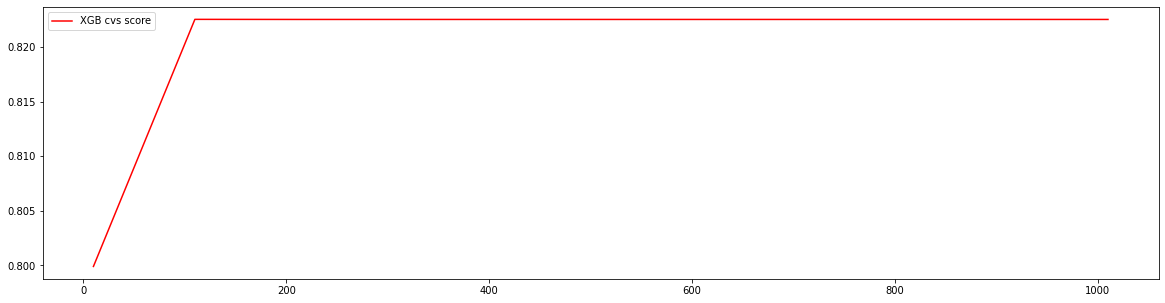

In [46]:
# 使用参数学习曲线观察n_estimators对模型的影响
rs=[]

for estimator in range(10,1011,100):
    reg=XGBR(n_estimators=estimator,random_state=420)
    rs.append(CVS(reg,x_train,y_train,cv=cv).mean())
    
print(rs.index(max(rs)),max(rs),list(range(10,1011,100))[rs.index(max(rs))])
plt.figure(figsize=(20,5))    
plt.plot(range(10,1011,100),rs,c="r",label="XGB cvs score")
plt.legend()
plt.show()


120 0.0
100 0.8320846498146868
120 0.0 0.02816675828385571 0.8321704487169923


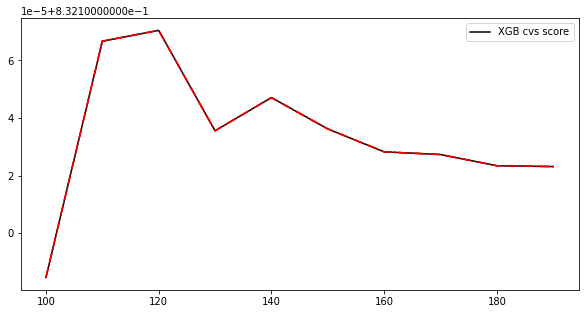

In [65]:
# 泛化误差=bias^2+var+e^2 偏差方+方差+噪声
var=[] #方差
rs=[] 
ge=[] #噪声
for estimator in range(100,200,10):
    reg=XGBR(n_estimators=estimator,subsample=0.6,random_state=420)
    result=CVS(reg,x_train,y_train,cv=cv).mean()
    # 记录偏差
    rs.append(result.mean())
    # 记录方差
    var.append(result.var())
    # 记录泛化误差的可控部分
    ge.append((1-result.mean())**2+result.var())
    
# 答应R2最高所对应的参数取值，并打印该参数下的方案
print(list(range(100,200,10))[rs.index(max(rs))],var[rs.index(max(rs))])

# 打印方差最低时候对应的参数取值，以及R2
print(list(range(100,200,10))[var.index(min(var))],rs[var.index(min(var))])

# 答应泛化误差可控部分最小时的参数取值，并打印三个评价指标对应取值
print(list(range(100,200,10))[ge.index(min(ge))],var[ge.index(min(ge))]
      ,min(ge),rs[ge.index(min(ge))])

rs=np.array(rs)
var=np.array(var)*0.02
plt.figure(figsize=(10,5))
plt.plot(range(100,200,10),rs+var,c="r",linestyle="-.")
plt.plot(range(100,200,10),rs,c="black",label="XGB cvs score")
plt.plot(range(100,200,10),rs-var,c="r",linestyle="-.")
plt.legend()
plt.show()

0.6 0.8320846498146868


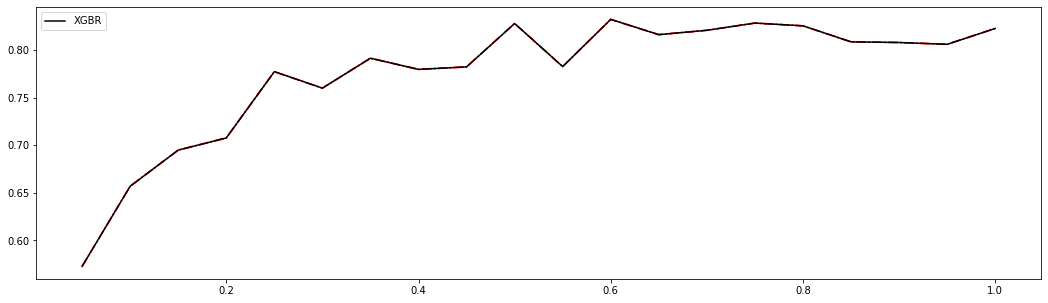

In [68]:
# 决策树剪枝，需要重点掌握
# 参数：subsample:有放回抽样,默认为1,取值为(0,1]，取值为抽样比例
# 观察学习曲线

n_samples=np.linspace(0.05,1,20)
rs=[]
var=[] #方差
for i in n_samples:
    reg=XGBR(n_estimators=100,subsample=i,random_state=420)
    rs.append(CVS(reg,x_train,y_train,cv=cv).mean())
    # 记录方差
    var.append(CVS(reg,x_train,y_train,cv=cv).var())
print(n_samples[rs.index(max(rs))],max(rs))
plt.figure(figsize=(18,5))

rs=np.array(rs)
var=np.array(var)*0.02

plt.plot(n_samples,rs+var,c="r",linestyle="-.")
plt.plot(n_samples,rs-var,c="r",linestyle="-.")
plt.plot(n_samples,rs,c='k',label="XGBR")
plt.legend()
plt.show()

In [80]:
# 迭代决策树
# 重要参数 eta:让模型更加倾向于处理那些难以判断的样本
# xgb.Regression 为learning_rate默认为0.1,取值为[0,1]
def regress_score(estimator,y_train,x_train,cv,scoring=["r2"],show=True):
    score=[]
    for i in range(len(scoring)):
        if show:
            print("{}:{:.3f}".format(scoring[i],CVS(estimator,x_train,y_train,cv=cv,scoring=scoring[i]).mean()))
        score.append(CVS(estimator,x_train,y_train,cv=cv,scoring=scoring[i]).mean())
    return score


regress_score(reg,y_train,x_train,cv,scoring=["r2","neg_mean_squared_error"])

r2:0.823
neg_mean_squared_error:-14.542


[0.8225388064135556, -14.541808135026432]

In [82]:
from time import time
import datetime

for l in [i/10 for i in range(10)]:
    begin=time()
    reg=XGBR(n_estimators=100,subsample=0.6,random_state=420,learning_rate=l)
    print("learning_rate ={:.1f}".format(l))
    regress_score(reg,y_train,x_train,cv,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S;%f"))
    print("\t")

learning_rate =0.0
r2:-6.135
neg_mean_squared_error:-558.159
00:00;694697
	
learning_rate =0.1
r2:0.828
neg_mean_squared_error:-13.775
00:01;066268
	
learning_rate =0.2
r2:0.794
neg_mean_squared_error:-16.658
00:01;147779
	
learning_rate =0.3
r2:0.832
neg_mean_squared_error:-13.529
00:01;198338
	
learning_rate =0.4
r2:0.784
neg_mean_squared_error:-17.527
00:01;198302
	
learning_rate =0.5
r2:0.743
neg_mean_squared_error:-21.074
00:01;231293
	
learning_rate =0.6
r2:0.743
neg_mean_squared_error:-20.223
00:01;182304
	
learning_rate =0.7
r2:0.671
neg_mean_squared_error:-25.667
00:01;153322
	
learning_rate =0.8
r2:0.663
neg_mean_squared_error:-27.275
00:01;141304
	
learning_rate =0.9
r2:0.602
neg_mean_squared_error:-31.005
00:01;123295
	


### 弱评估器

##### gbtree,gblinear,dart
##### gbtree:梯度提升树
##### dart：抛弃提升树,dropouts meet Muliple additive regression trees
##### gblinear:线性模型

In [86]:
boosters=['gbtree','gblinear','dart']
for booster in boosters:
    begin=time()
    reg=XGBR(n_estimators=100,random_state=420,learning_rate=0.3,booster=booster)
    print("booster :%s"%booster)
    regress_score(reg,y_train,x_train,cv,scoring=["r2","neg_mean_squared_error"])
    print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S;%f"))
    print("\t")

booster :gbtree
r2:0.823
neg_mean_squared_error:-14.542
00:01;200274
	
booster :gblinear
r2:-281266952764584192.000
neg_mean_squared_error:-96015973188073440.000
00:00;157034
	
booster :dart
r2:0.823
neg_mean_squared_error:-14.542
00:04;336131
	


### 目标函数

##### 重要参数：objective,
##### obj=损失（偏差）+模型复杂度(方差)
##### 第一部分可以选（损失）
##### xgb.XGBRegressor()默认为linear，均方误差
##### xgb.XGBClassifier()默认为logistic，对数损失
##### hinge:使用支持向量机的损失函数，用于二分类
##### softmax:多分类使用


In [93]:
import xgboost as xgb

# 使用dematrix读取数据
dtrain=xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)

# 无法直接查看dtran，一般先在pandas中查看，再放入DMatrix
dtrain

In [105]:
# 写参数
param={#"silent":False,
       "objective":'reg:linear','eta':0.1}
num_round=180 #树的数目


# 类train,可以直接导入的参数时训练数据，树的数目，其他参数通过params来导入
bst=xgb.train(param,dtrain,num_round)

# predict
preds=bst.predict(dtest)

from sklearn.metrics import r2_score
r2_score(y_test,preds) 

[10:43:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


0.9128050846949581

In [102]:
MSE(y_test,preds) #均方误差

7.991805240168548

### 求解xgb的目标函数


##### 一个叶子节点上的所有样本所对应的叶子权重相等

##### xgb与gbdt的核心区别，正则项的存在

##### L1正则项参数alpha:默认为0，取值范围为[0,+]
##### L2正则化参数lambda:默认为1,取值为[0,+]

In [111]:
# 使用网格搜索
from sklearn.model_selection import GridSearchCV

param={"reg_alpha":np.arange(0,1,0.05),"reg_lambda":np.arange(0,1,0.05)}

gscv=GridSearchCV(reg,param_grid=param,scoring="neg_mean_squared_error",cv=cv)

begin=time()
gscv.fit(x_train,y_train)

print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))
gscv.best_params_ #最佳参数组合

06:46:307287


{'reg_alpha': 0.7000000000000001, 'reg_lambda': 0.65}

In [113]:
gscv.best_score_

-11.86355578856032

In [114]:
preds=gscv.predict(x_test)

from sklearn.metrics import r2_score
r2_score(y_test,preds)

0.9067327697464874

In [115]:
MSE(y_test,preds)

8.54836015229123

### 寻找最佳树结构

##### 使用贪心算法求解
##### 让树停止生长，重要参数gamma

1.2000000000000002 0.0
0.0 0.8320846498146868
1.2000000000000002 0.0 0.02554080963242443 0.8401850769407799


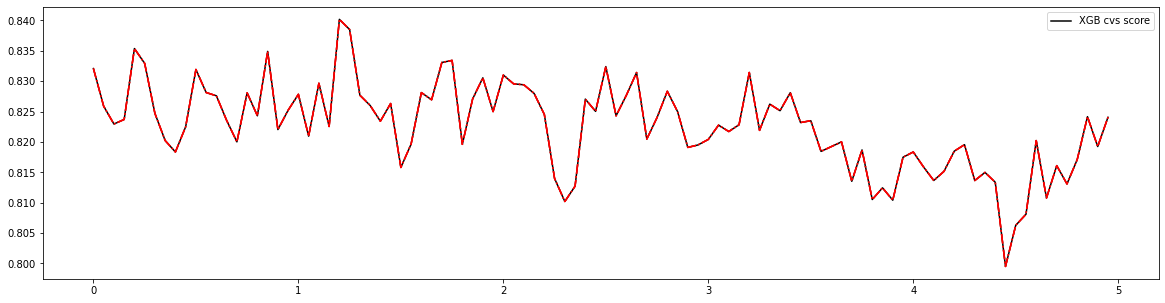

In [119]:
# 绘制学习曲线
axisx=np.arange(0,5,0.05)

# 泛化误差=bias^2+var+e^2 偏差方+方差+噪声
var=[] #方差
rs=[] 
ge=[] #噪声
for g in axisx:
    reg=XGBR(n_estimators=100,subsample=0.6,gamma=g,random_state=420)
    result=CVS(reg,x_train,y_train,cv=cv).mean()
    # 记录偏差
    rs.append(result.mean())
    # 记录方差
    var.append(result.var())
    # 记录泛化误差的可控部分
    ge.append((1-result.mean())**2+result.var())
    
# 答应R2最高所对应的参数取值，并打印该参数下的方案
print(axisx[rs.index(max(rs))],var[rs.index(max(rs))])

# 打印方差最低时候对应的参数取值，以及R2
print(axisx[var.index(min(var))],rs[var.index(min(var))])

# 答应泛化误差可控部分最小时的参数取值，并打印三个评价指标对应取值
print(axisx[ge.index(min(ge))],var[ge.index(min(ge))]
      ,min(ge),rs[ge.index(min(ge))])

rs=np.array(rs)
var=np.array(var)*0.1
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB cvs score")
plt.plot(axisx,rs+var,c="r",linestyle="-.")
plt.plot(axisx,rs-var,c="r",linestyle="-.")
plt.legend()
plt.show()


In [126]:
# 使用xgboost.cv
import xgboost as xgb

# 使用全部数据
dfull=xgb.DMatrix(x,y)

# 设定参数
paraml={"objective":'reg:linear',"gamma":0}
num_round=100
n_fold=5

#同时打印训练集和测试集分数
begin=time()
cvresult=xgb.cv(paraml,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))
cvresult

[14:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
00:00:223082


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.105578,0.129116,17.163215,0.584297
1,12.337972,0.097558,12.519735,0.473457
2,8.994071,0.065756,9.404534,0.472310
3,6.629481,0.050323,7.250335,0.500342
4,4.954406,0.033209,5.920813,0.591874
...,...,...,...,...
95,0.025204,0.005145,3.669921,0.858313
96,0.024422,0.005242,3.669984,0.858255
97,0.023661,0.005117,3.669947,0.858332
98,0.022562,0.004704,3.669868,0.858578


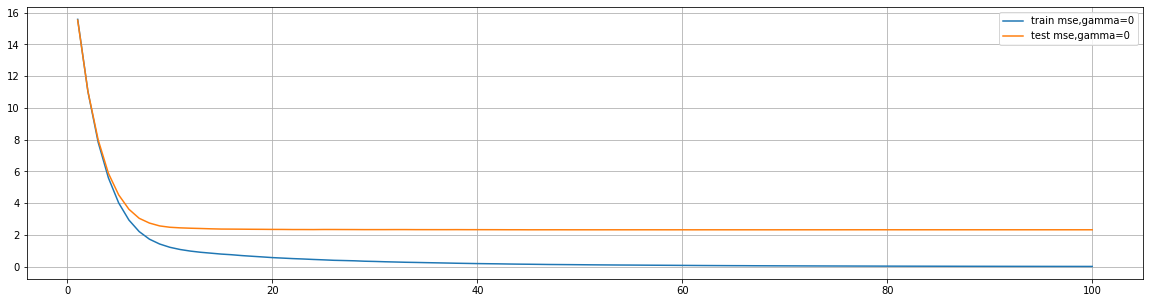

In [129]:
# 绘制图像
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult.iloc[:,0],label="train mse,gamma=0")
plt.plot(range(1,101),cvresult.iloc[:,2],label="test mse,gamma=0")
plt.legend()
plt.show()

[14:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[14:51:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
00:00:210046


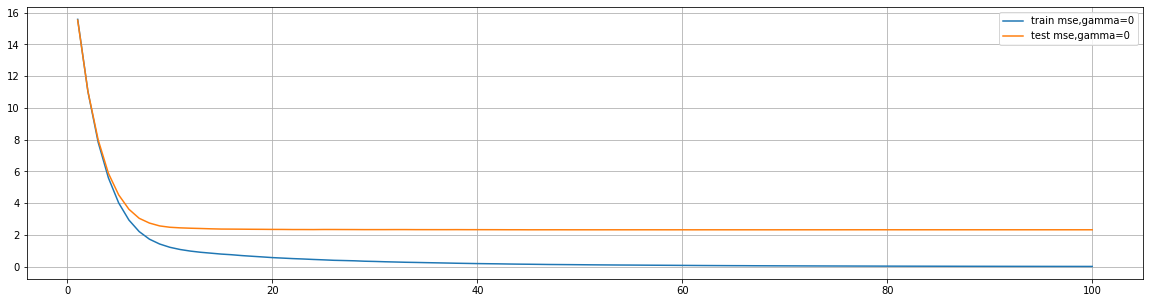

In [131]:
# 使用xgboost.cv
import xgboost as xgb

# 使用全部数据
dfull=xgb.DMatrix(x,y)

# 设定参数
paraml={"objective":'reg:linear',"gamma":0
        ,"eval_metric":"mae" #绝对平均误差
       }
num_round=100
n_fold=5

#同时打印训练集和测试集分数
begin=time()
cvresult=xgb.cv(paraml,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))
cvresult


# 绘制图像
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult.iloc[:,0],label="train mae,gamma=0")
plt.plot(range(1,101),cvresult.iloc[:,2],label="test mae,gamma=0")
plt.legend()
plt.show()

[15:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
[15:08:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.
00:00:216556


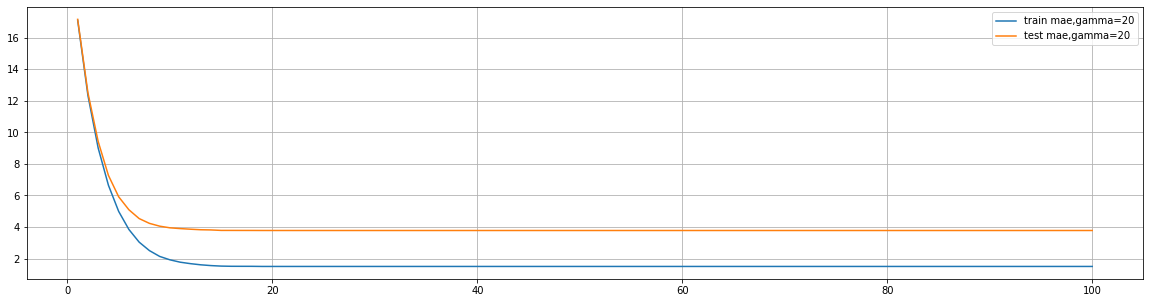

In [145]:
# 使用xgboost.cv
# 使用后剪枝
# 通过降低训练集上的表现来降低过拟合

import xgboost as xgb

# 使用全部数据
dfull=xgb.DMatrix(x,y)

# 设定参数
paraml={"objective":'reg:linear',"gamma":20
        ,"eval_metric":"rmse" #绝对平均误差
       }
num_round=100
n_fold=5

#同时打印训练集和测试集分数
begin=time()
cvresult=xgb.cv(paraml,dfull,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))
cvresult


# 绘制图像
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult.iloc[:,0],label="train mae,gamma=20")
plt.plot(range(1,101),cvresult.iloc[:,2],label="test mae,gamma=20")
plt.legend()
plt.show()

00:00:157035
00:00:184041


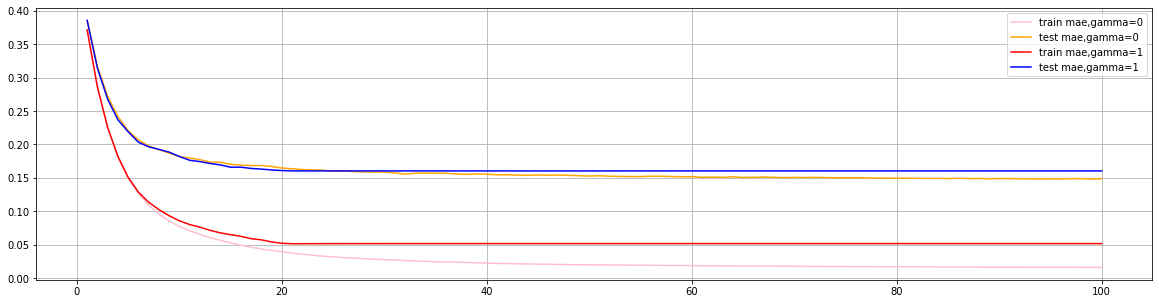

In [143]:
# 使用乳腺癌数据集
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
x1,y1=data.data,data.target

dfull1=xgb.DMatrix(x1,y1)

paraml1={'objective':'binary:logistic','gamma':0,'eval_metric':'rmse'}
paraml2={'objective':'binary:logistic','gamma':1,'eval_metric':'rmse'}
num_ronud=100
n_fold=5

#同时打印训练集和测试集分数
begin=time()
cvresult1=xgb.cv(paraml1,dfull1,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))


begin=time()
cvresult2=xgb.cv(paraml2,dfull1,num_round,n_fold)
print(datetime.datetime.fromtimestamp(time()-begin).strftime("%M:%S:%f"))


# 绘制图像
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(range(1,101),cvresult1.iloc[:,0],c="pink",label="train mae,gamma=0")
plt.plot(range(1,101),cvresult1.iloc[:,2],c="orange",label="test mae,gamma=0")

plt.plot(range(1,101),cvresult2.iloc[:,0],c="r",label="train mae,gamma=1")
plt.plot(range(1,101),cvresult2.iloc[:,2],c="b",label="test mae,gamma=1")
plt.legend()
plt.show()